<a href="https://colab.research.google.com/github/segzy01/Oluwasegun-Durowoju-Prework/blob/master/a4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')
#below where the file is in gdrive, change with yours
data_path = "/content/drive/My Drive/AI_764/"
###yearsBase, meanBase = np.loadtxt(data_path + 'file.csv', delimiter=',', unpack=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Dense
from warnings import WarningMessage
WarningMessage

warnings.WarningMessage

Define X & Y

In [ ]:
import numpy as np
newData = np.genfromtxt('/content/CellDNA (1).csv', delimiter = ',')
X, Raw_Y = np.split(newData, [-1], axis=1)    # split data into X and Y
Y = np.where(Raw_Y > 0, 1, 0) 
print(X[0])
print(Y)

[222.          31.18918919  40.34234234  35.57908668   8.88391697
   0.96832456 -80.11367302 222.           1.          16.81247093
   0.81617647   0.578125    78.591     ]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(X.shape, Y.shape)
print(X.ndim, Y.ndim)

(1217, 13) (1217, 2)
2 2


Preprocess X & Y

In [ ]:
# Standardizing X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X[0])

[ 0.15952762 -1.80200559 -1.20813407  0.11441999 -0.13568869  0.53831071
 -1.58742636  0.13583286  0.23329249  0.32962609  0.34511514  0.65289142
 -0.00691284]


In [ ]:
# Convert array of labeled data to one-hot vector
from keras.utils.np_utils import to_categorical
Y = to_categorical(Y,2)


In [ ]:
#print(X.shape, Y.shape)
print(X.ndim, Y.ndim)

2 2


In [ ]:
print(Y.shape, Y.ndim)
#Y_flat = np.ndarray.flatten(Y)

(1217, 2) 2


In [ ]:
print(Y)
print(Y.ndim)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
2


**NN Library**


In [ ]:
model_1 =Sequential()
model_1.add(Dense(9, input_dim=13, activation='relu', name='h1'))
model_1.add(Dense(5, activation='relu',name='h2'))
model_1.add(Dense(5, activation='relu',name='h3'))
model_1.add(Dense(2,activation='softmax', name='O'))
model_1.compile(loss='binary_crossentropy', optimizer='Adam', 
metrics=['accuracy'] )
model_1.fit(X,Y, epochs=20,batch_size=20,verbose=1)

Epoch 1/20
61/61 [==============================] - 2s 8ms/step - loss: 0.5824 - accuracy: 0.7765
Epoch 2/20
61/61 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8307
Epoch 3/20
61/61 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8348
Epoch 4/20
61/61 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8381
Epoch 5/20
61/61 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8513
Epoch 6/20
61/61 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.8628
Epoch 7/20
61/61 [==============================] - 1s 15ms/step - loss: 0.2707 - accuracy: 0.8800
Epoch 8/20
61/61 [==============================] - 0s 6ms/step - loss: 0.2612 - accuracy: 0.8850
Epoch 9/20
61/61 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.8948
Epoch 10/20
61/61 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.9014
Epoch 11/20
61/61 

In [ ]:
# create a newmodel by copying from previously trained model
model_2 = Model(inputs=model_1.input,
outputs=model_1.get_layer('h3').output)

In [ ]:
Z_Code= model_2.predict(X)

39/39 [==============================] - 1s 13ms/step


In [ ]:
# tsne Z_Code to 2-D
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
tsne=TSNE(n_components=2, random_state=0)
tsne_z=tsne.fit_transform(Z_Code)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
# t-sne raw x to 2-D
tsne_x=tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
x1,y1=tsne_z[:,0],tsne_z[:,1]
x2,y2=tsne_x[:,0],tsne_x[:,1]


In [ ]:
print(x1.shape, y1.shape, Y.shape)

(1217,) (1217,) (1217, 2)


In [ ]:
Y[:,0]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'tsne x')]

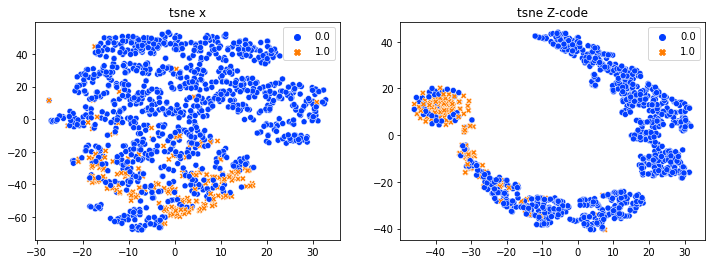

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, figsize=(12,4))
#unique_values = np.unique(Y)
#palette = sns.color_palette("bright", len(unique_values))
palette = sns.color_palette("bright", 2)

# color
sns.scatterplot(x1, y1, palette=palette,style=Y[:,1], hue=Y[:,1], legend='full',ax=axes[1]).set(title = 'tsne Z-code')
sns.scatterplot(x2, y2, palette=palette, style=Y[:,1], hue=Y[:,1], legend='full',ax=axes[0]).set(title = 'tsne x')